# EDA for all the data from from three job sites, Dice , Indeed and SimplyHired

## Import New Data (sep 2022)

In [1]:
import numpy as np
import pandas as pd
import os
import re

In [2]:
os.chdir(r'C:\Users\chitr\gc-march-2022\data')

In [3]:
dice_da = pd.read_csv('dice_DataAnalyst_2022.csv')
dice_de = pd.read_csv('dice_DataEngineer_2022.csv')
dice_ds = pd.read_csv('dice_Datascientist_2022.csv')

id_da = pd.read_csv('Indeed_DataAnalyst_2022.csv')
id_de = pd.read_csv('Indeed_DataEngineer_2022.csv')
id_ds = pd.read_csv('Indeed_DataScience_2022.csv')

sh_de = pd.read_csv('simplyhired-DE-2022.csv')
sh_da = pd.read_csv('simplyhired-DA-2022.csv')
sh_ds = pd.read_csv('simplyhired-DS-2022.csv')

df = pd.concat([dice_da,dice_de,dice_ds,id_da,id_de,id_ds,sh_da,sh_de,sh_ds], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18230 entries, 0 to 18229
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18230 non-null  int64 
 1   title        18230 non-null  object
 2   company      18228 non-null  object
 3   description  18228 non-null  object
 4   location     18228 non-null  object
 5   salary       5740 non-null   object
dtypes: int64(1), object(5)
memory usage: 854.7+ KB


In [4]:
df

,Unnamed: 0,title,company,description,location,salary
0,0,Data Analyst,3K Technologies,"Data Analyst Eden Prairie, MN (Remote) 1 Year ...",Remote,NaN
1,1,Data Analyst,IDC Technologies,Data Analyst 100% remote Contract Job Descr...,Remote,NaN
2,2,Data Analyst,AIMIC Inc.,"Data Analyst Reston, VA (Remote to start but M...",Remote,NaN
3,3,Data Analyst,Vaco Technology,Job Title: Data Analyst Location: New York/ R...,"New York, NY, USA",NaN
4,4,Data Analyst,Nivid InfoTech Inc.,"Data Analyst Atlanta, GA ( Remote to start ) ...","Remote or Atlanta, GA, USA",NaN
...,...,...,...,...,...,...
18225,3283,"Postdoctoral Fellow, Data Science RWE Advanced...",Johnson & Johnson,Proven track record of consistently delivering...,United States +1 location,NaN
18226,3284,Sr Associate Data Scientist (REMOTE),"The Travelers Companies, Inc.","Heavy concentration in mathematics, including ...","Hartford, CT","$96,800 - $159,700 a year"
18227,3285,Data Analyst with Databricks,DataPattern,Development of Roadmap based on provided strat...,Remote,$60 - $65 an hour
18228,3286,Research Statistician,The Geneva Foundation,Approximately 10 Hours a week (25% Effort). Po...,"San Antonio, TX",NaN


### Data cleaning

In [5]:
df= df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates(ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9160 entries, 0 to 9159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9160 non-null   object
 1   company      9158 non-null   object
 2   description  9158 non-null   object
 3   location     9158 non-null   object
 4   salary       1888 non-null   object
dtypes: object(5)
memory usage: 357.9+ KB


In [6]:
df['title'] = df['title'].str.lower()
df['company'] = df['company'].str.lower()
df['description'] = df['description'].str.lower()
df['location'] = df['location'].str.lower()

In [7]:
df['is_remote'] = np.where(df['location'].str.contains('remote'),1,0)
df

,title,company,description,location,salary,is_remote
0,data analyst,3k technologies,"data analyst eden prairie, mn (remote) 1 year ...",remote,NaN,1
1,data analyst,idc technologies,data analyst 100% remote contract job descr...,remote,NaN,1
2,data analyst,aimic inc.,"data analyst reston, va (remote to start but m...",remote,NaN,1
3,data analyst,vaco technology,job title: data analyst location: new york/ r...,"new york, ny, usa",NaN,0
4,data analyst,nivid infotech inc.,"data analyst atlanta, ga ( remote to start ) ...","remote or atlanta, ga, usa",NaN,1
...,...,...,...,...,...,...
9155,"postdoctoral fellow, data science rwe advanced...",johnson & johnson,"at johnson & johnson, we use technology and th...",united states +1 location,NaN,0
9156,sr associate data scientist (remote),"the travelers companies, inc.","who are we? taking care of our customers, our ...","hartford, ct","$96,800 - $159,700 a year",0
9157,data analyst with databricks,datapattern,* work with stakeholders such as business user...,remote,$60 - $65 an hour,1
9158,research statistician,the geneva foundation,overview: the geneva foundation is a non-profi...,"san antonio, tx",NaN,0


In [8]:
skills=['python','java','sql','spark','hadoop','bigdata','machine learning','hive','pig','git','nosql','aws','azure', 'power bi', 'tableau','etl','agile','relational databases','postgres','matlab','graphql','data analysis','excel','data modeling','shell scripting','gcp','cloud computing','deep learning','nlp','flask','eda','data transformation','informatica']

df['skills'] = np.nan

for ind in df.index:
    desc=df['description'][ind]
 
    desc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(desc))
    lst = ''
    for skill in skills:
        if  re.search(skill,desc):
            lst=lst+skill+','
    lst = lst[:-1]
   
    if ind < len(df):
        df['skills'].iloc[ind]=lst

df.head(10)

C:\Users\chitr\AppData\Local\Temp\ipykernel_19924\1786689822.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skills'].iloc[ind]=lst


,title,company,description,location,salary,is_remote,skills
0,data analyst,3k technologies,"data analyst eden prairie, mn (remote) 1 year ...",remote,NaN,1,"sql,power bi"
1,data analyst,idc technologies,data analyst 100% remote contract job descr...,remote,NaN,1,
2,data analyst,aimic inc.,"data analyst reston, va (remote to start but m...",remote,NaN,1,
3,data analyst,vaco technology,job title: data analyst location: new york/ r...,"new york, ny, usa",NaN,0,
4,data analyst,nivid infotech inc.,"data analyst atlanta, ga ( remote to start ) ...","remote or atlanta, ga, usa",NaN,1,sql
5,data analyst,bcforward,data analyst bcforward is currently seeking a ...,"new york, ny, usa",NaN,0,
6,data analyst,kabtec,greetings! hope you are doing great today!! ...,"pleasant prairie, wi, usa",NaN,0,
7,data analyst,randstad technologies,job summary: the primary purpose of this job ...,"tampa, fl, usa",NaN,0,
8,data analyst,sira consulting,"job title: data analyst location: natick, ma ...",remote,NaN,1,"sql,data modeling"
9,data analyst,compugain llc,description:data analyst: the candidate will w...,,NaN,0,


In [9]:
df['job_type'] = np.where(df['title'].str.contains('analy'),'Data Analyst','0')
df['job_type'] = np.where(df['title'].str.contains('engineer'),'Data Engineer',df['job_type'])
df['job_type'] = np.where(df['title'].str.contains('scien'),'Data Scientist',df['job_type'])
df['job_type'] = np.where(df['job_type'] == '0','Other',df['job_type'])
df

,title,company,description,location,salary,is_remote,skills,job_type
0,data analyst,3k technologies,"data analyst eden prairie, mn (remote) 1 year ...",remote,NaN,1,"sql,power bi",Data Analyst
1,data analyst,idc technologies,data analyst 100% remote contract job descr...,remote,NaN,1,,Data Analyst
2,data analyst,aimic inc.,"data analyst reston, va (remote to start but m...",remote,NaN,1,,Data Analyst
3,data analyst,vaco technology,job title: data analyst location: new york/ r...,"new york, ny, usa",NaN,0,,Data Analyst
4,data analyst,nivid infotech inc.,"data analyst atlanta, ga ( remote to start ) ...","remote or atlanta, ga, usa",NaN,1,sql,Data Analyst
...,...,...,...,...,...,...,...,...
9155,"postdoctoral fellow, data science rwe advanced...",johnson & johnson,"at johnson & johnson, we use technology and th...",united states +1 location,NaN,0,,Data Scientist
9156,sr associate data scientist (remote),"the travelers companies, inc.","who are we? taking care of our customers, our ...","hartford, ct","$96,800 - $159,700 a year",0,,Data Scientist
9157,data analyst with databricks,datapattern,* work with stakeholders such as business user...,remote,$60 - $65 an hour,1,spark,Data Analyst
9158,research statistician,the geneva foundation,overview: the geneva foundation is a non-profi...,"san antonio, tx",NaN,0,,Other


In [10]:
df.to_csv(r'C:\Users\chitr\gc-march-2022\Cleaned_New_Data.csv', index=False)

### Import old data for comparison

In [11]:
old_dice_df = pd.read_csv('dice.csv')
old_id_df = pd.read_csv('indeed_jobs.csv')
old_sh_df = pd.read_csv('simplyhired.csv')

old_df = pd.concat([old_dice_df, old_id_df, old_sh_df], ignore_index=True)
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5627 entries, 0 to 5626
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5627 non-null   int64 
 1   title        5627 non-null   object
 2   company      3357 non-null   object
 3   description  5608 non-null   object
 4   location     5627 non-null   object
 5   salary       1091 non-null   object
 6   jobtype      452 non-null    object
dtypes: int64(1), object(6)
memory usage: 307.9+ KB


In [12]:
old_df

,Unnamed: 0,title,company,description,location,salary,jobtype
0,0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","Reliable Software Resources Pittsburgh, PA, USA",NaN,NaN
1,1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"DEEGIT, INC. Remote",NaN,NaN
2,2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","Ampcus Inc Alpharetta, GA, USA",NaN,NaN
3,3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",Blend360 Remote,NaN,NaN
4,4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"Flexion Inc Minneapolis, MN, USA",NaN,NaN
...,...,...,...,...,...,...,...
5622,3283,Principal Data Scientist (open to remote),Mission Lane,To use distributed computing systems like Spar...,"Richmond, VA",NaN,NaN
5623,3284,Director of Data & Analytics,Owlet Baby Care,"Manage, mentor and grow a data team that inclu...",Remote +1 location,NaN,NaN
5624,3285,Jr. Data Scientist,Abercrombie and Fitch Co.,Primary objectives are to monetize our custome...,"Columbus, OH",NaN,NaN
5625,3286,Staff Data Scientist,The Walt Disney Company (Corporate),Answer business questions using cloud data and...,"Seattle, WA",NaN,NaN


In [13]:
old_df= old_df.drop(columns=['Unnamed: 0','jobtype'])
old_df = old_df.drop_duplicates(ignore_index=True)
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1983 non-null   object
 1   company      1069 non-null   object
 2   description  1977 non-null   object
 3   location     1983 non-null   object
 4   salary       346 non-null    object
dtypes: object(5)
memory usage: 77.6+ KB


In [14]:
old_df['title'] = old_df['title'].str.lower()
old_df['company'] = old_df['company'].str.lower()
old_df['description'] = old_df['description'].str.lower()
old_df['location'] = old_df['location'].str.lower()

In [15]:
old_df['is_remote'] = np.where(old_df['location'].str.contains('remote'),1,0)
old_df

,title,company,description,location,salary,is_remote
0,data science architect,reliable software resources,"responsibilities: provides vision, expertise a...","reliable software resources pittsburgh, pa, usa",NaN,0
1,full stack engineer with data science,"deegit, inc.",a full stack engineer with deep understanding ...,"deegit, inc. remote",NaN,1
2,principal-pred/pres analytics - data science,ampcus inc,"hello, greetings from ampcus inc. ampcus is ...","ampcus inc alpharetta, ga, usa",NaN,0
3,data science director,blend360,"edit dynamic, fast-growing, entrepreneurial d...",blend360 remote,NaN,1
4,director of data science (3708),flexion inc,flexion is currently seeking a director of dat...,"flexion inc minneapolis, mn, usa",NaN,0
...,...,...,...,...,...,...
1978,technology analyst program - quality assurance...,"fiserv, inc.",fiserv's technology analyst program is an earl...,"alpharetta, ga",NaN,0
1979,research assistant/data analyst,institute of neuro innovation,"education: undergraduate (minimum), graduate (...","santa monica, ca",$26 - $50 an hour,0
1980,principal data scientist (open to remote),mission lane,"a low-ego, respectful, data science team commi...","richmond, va",NaN,0
1981,machine learning engineer,ampersand,the machine learning engineering team at amper...,"new york, ny",NaN,0


In [16]:
old_df.to_csv(r'C:\Users\chitr\gc-march-2022\Cleaned_Old_Data.csv', index=False)

## What is remote Job trend in past year?

In [17]:
df.is_remote.value_counts()

0    6211
1    2949
Name: is_remote, dtype: int64

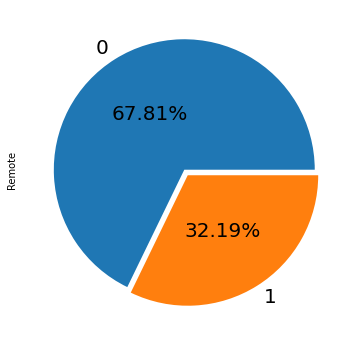

In [18]:
separate = [0, 0.05]
pie = df['is_remote'].value_counts().plot.pie(
            explode=separate,
            autopct=(lambda p : '{:.2f}%'.format(p)),
            fontsize=20,label='Remote', pctdistance=0.5,
            figsize=(6, 6))

In [19]:
old_df.is_remote.value_counts()

0    1605
1     378
Name: is_remote, dtype: int64

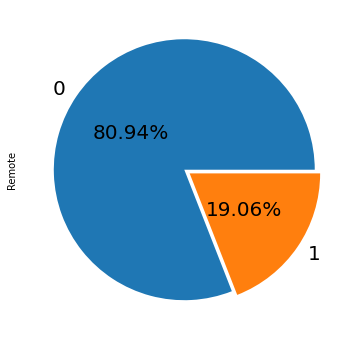

In [20]:
separate = [0, 0.05]
pie = old_df['is_remote'].value_counts().plot.pie(
            explode=separate,
            autopct=(lambda p : '{:.2f}%'.format(p)),
            fontsize=20,label='Remote', pctdistance=0.5,
            figsize=(6, 6))

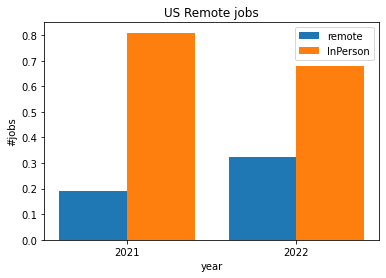

In [21]:
import matplotlib.pyplot as plt
year = ['2021','2022']
plt.title("US Remote jobs")
plt.xlabel("year")
plt.ylabel("#jobs")
xpos=np.arange(len(year))
plt.xticks(xpos, year)

plt.bar(xpos-0.2,[old_df['is_remote'].value_counts(normalize=True)[1], df['is_remote'].value_counts(normalize=True)[1]],width=0.4,label='remote')
plt.bar(xpos+0.2,[old_df['is_remote'].value_counts(normalize=True)[0], df['is_remote'].value_counts(normalize=True)[0]],width=0.4,label='InPerson')
plt.legend()

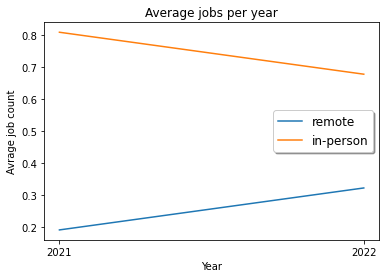

In [22]:
plt.xlabel('Year')
plt.ylabel('Avrage job count')
plt.title('Average jobs per year')

plt.plot(year,[old_df['is_remote'].value_counts(normalize=True)[1], df['is_remote'].value_counts(normalize=True)[1]],label = 'remote')
plt.plot(year,[old_df['is_remote'].value_counts(normalize=True)[0], df['is_remote'].value_counts(normalize=True)[0]],label = 'in-person')

plt.legend(loc='best',shadow=True, fontsize = 'large')

#plt.grid()

In [23]:
remote_jobs = pd.DataFrame([['2021', old_df['is_remote'].value_counts(normalize=True)[1], 'Yes'],
                            ['2021', old_df['is_remote'].value_counts(normalize=True)[0], 'No'],
                            ['2022', df['is_remote'].value_counts(normalize=True)[1], 'Yes'],
                            ['2022', df['is_remote'].value_counts(normalize=True)[0], 'No']],
            columns=['Year','Average Jobs','Remote'])
remote_jobs

,Year,Average Jobs,Remote
0,2021,0.190620,Yes
1,2021,0.809380,No
2,2022,0.321943,Yes
3,2022,0.678057,No


In [25]:
import plotly.express as px

testdf = remote_jobs.query("Remote == 'Yes'")

#testdf

fig = px.line(testdf, x="Year", y="Average Jobs", title='Average Remote Jobs Per Year', markers=True)
fig.show()

## Assumptions and conclusion

####  The outbreak of COVID-19 prompted many employers to shift to a remote work model for all employees possible in a bid to limit the spread of the coronavirus.  Working remotely has traditionally held a bad reputation, but more and more companies are adopting work-from-home policies. Even though most of the companies started InPerson work we still see the remote work trend keep on going due to felxibility it offers. From above charts we definately see the increase in remote jobs between March 2022 and September 2022 by almost 13%. 

## What are latest top 10 skills required ?

In [26]:
result = df.skills.str.split(',',expand=True).stack().value_counts().reset_index()
result.columns = ['Word','Frequency']
result = result[1:]
result

,Word,Frequency
1,sql,887
2,python,657
3,data analysis,539
4,git,519
5,etl,418
6,aws,404
7,machine learning,342
8,spark,325
9,excel,265
10,azure,233


In [28]:
fig = px.funnel( x=result.Frequency.values[0:10], y=result.Word.values[0:10])
fig.show()

#### The funnel chart shows the top 10 skills across all data from different job sites that we collected.  Can’t get away from those schemas and their infamous joining syntax yet! And we see that SQL being top required skill here. Relational Database Management Systems (RDBMS) are key still to data discovery and reporting no matter where they reside. Knowledge of terminology and familiarity with algorithms remain an important part of the Data Engineers skillset. At minimum familiarity with Python’s libraries NumPy, SciPy, pandas, sci-kit learn and some actual experience with Notebooks (Jupyter or online cloud) is vital. Exploratory Data Analysis (EDA) appears again now as part of Data Engineers talents to ensure ETL /ELT work mentioned earlier is successful. Data quality of the resultant data is crucial as the Data Engineers processes and visualizes datasets. No longer content to be tied to single cloud vendors companies are opting to join the multi-cloud, instead of which cloud technology to choose, many enterprises have already chosen a couple. A Data Engineer still needs to have a good understanding of the underlying technologies that make up cloud computing and in particular, knowledge around IaaS, PaaS, and SaaS implementations. And we can see that as AWS and Azure making into top-10 skills asked.

 

# Which job category got most jobs? Data engineering, Data Analyst or Data Science?

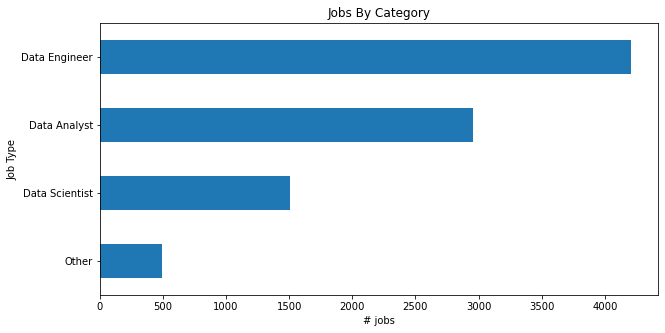

In [29]:
fig = plt.figure(figsize = (10,5))
df.job_type.value_counts(ascending=True).plot.barh()
plt.title('Jobs By Category')
plt.xlabel("# jobs")
plt.ylabel("Job Type")
plt.show()

In [30]:
result=df.job_type.value_counts()

In [31]:
fig = px.pie(df, values=df.job_type.value_counts(), names=df.job_type.value_counts().index)
fig.show()


#### Even though we are seeing different trend on different job sites, when we combined all the data from different job sites we see that majority are titled Data Engineer. And Intrestingly almost 78% jobs are for Data Engineer and Data analyst !!

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


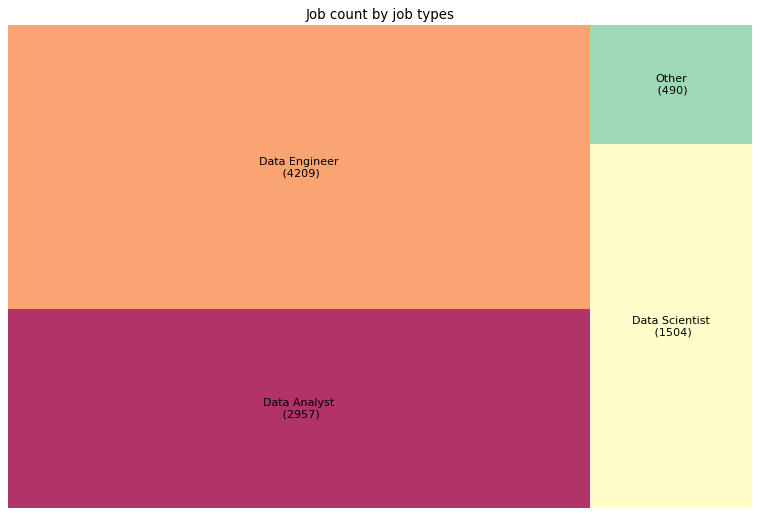

In [33]:
!apt-get install squarify python3-squarify
! pip install squarify
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

jobcategory =df.groupby('job_type').size().reset_index(name='counts')
labels = jobcategory.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = jobcategory['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Job count by job types')
plt.axis('off')
plt.show()

In [46]:
result = df.groupby(['job_type']).size()
result = result.to_frame()
result = result.reset_index()
result.columns = ['job_type','job_count']
result

fig = px.treemap(result, path=[px.Constant("Title"),'job_type'], values='job_count', color='job_count')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [34]:
jobcategory

,job_type,counts
0,Data Analyst,2957
1,Data Engineer,4209
2,Data Scientist,1504
3,Other,490


## What is the overall job avaibility aross USA?